In [1]:
import pandas as pd
import yaml
import functions as f


In [2]:
try:
    with open (r"config.yaml",'r') as file:
        config=yaml.safe_load(file)
except Exception as p:
    print("Error reading the config file")

In [3]:
df_final_demo=pd.read_csv(config["data"]["final_demo"])
df_experiment_clients=pd.read_csv(config["data"]["final_experiment"])
df_pt1=pd.read_csv(config["data"]["pt1"])
df_pt2=pd.read_csv(config["data"]["pt2"])

In [4]:
#Se verifican valores nulos, encontrando 14 filas con valores nulos y una fila con un único valor nulo.
#Se eliminan las filas con todos valores nulos y se analiza el valor nulo único. 
df_final_demo.isnull().sum()


client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [5]:
#Se eliminan todas las filas con 2 o más valores nulos.
df_finall=df_final_demo.dropna(thresh=2)


In [6]:
#Se analiza la fila con un único valor nulo, 
df_finall.loc[df_finall['clnt_age'].isna()]
#Se extrae el client id para observar su registro en df:experiment, y se observa variation= Control
df_experiment_clients.loc[df_experiment_clients['client_id']==4666211]
#Por lo tanto, se elimina la df_finall, PARA REALIZAR ANÁLISIS UNIVARIABLE Y BI VARIABLE.

,client_id,Variation
38552,4666211,Control


In [7]:
#Dataframe df_finall limpio PARA REALIZAR ANÁLISIS UNIVARIABLE Y BI VARIABLE.
df_finall=df_finall.dropna(how="any")
df_finall.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [8]:
df_finall.sample(10)
df_finall_num= df_finall[['clnt_tenure_yr','clnt_tenure_mnth','clnt_age','bal','calls_6_mnth','logons_6_mnth','num_accts']]
df_finall_cat=df_finall[['gendr','num_accts']]

In [9]:
df_finall["client_id"].nunique()

70594

### EDA univariable numéricas

ANÁLISIS DE VARIABLE: clnt_tenure_yr 

media: 12.053007337734085 
 mediana: 11.0 
 moda: 6.0
 varianza: 47.222325819018934
 desviación estándar: 6.8718502471327865
 rango:60.0
 rango intercuartil: 10.0 
 Asimetría: 1.0366247018480386 
 Curtosis: 1.0709232170805043


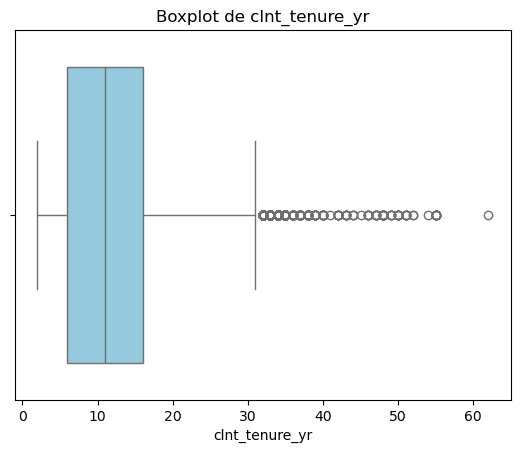

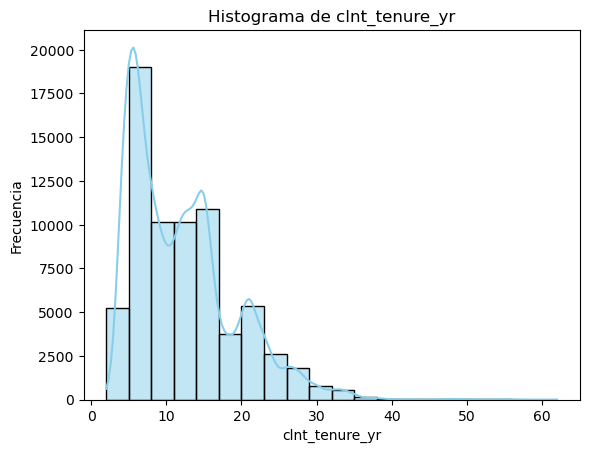

'Se observa la presencia de outliers en los datos, que comparados con la media de los clientes representan a aquellas personas\ncon la mayor cantidad de años como clientes del banco. Esto también se traduce un alto valor de la varianza\nAl ser parte de los clientes, no pueden ser omitidos para el análisis.\n\nPor su parte, el coeficiente de asimetría mayor a cero indica un sesgo positivo que concentra los datos a la derecha, hecho \ncomprobable en el histograma generado\n\nRespecto al coeficiente de curtosis, con un valor 1.07, se considera una curva leptocúrtica por la importante densidad de datos\ncercanos a la media.\n.\n'

In [10]:
#clnt_tenure_yr: how long the client has been with Vanguard (YEARS)
f.basic_stat(df_finall_num,'clnt_tenure_yr',True,20)
'''Se observa la presencia de outliers en los datos, que comparados con la media de los clientes representan a aquellas personas
con la mayor cantidad de años como clientes del banco. Esto también se traduce un alto valor de la varianza
Al ser parte de los clientes, no pueden ser omitidos para el análisis.

Por su parte, el coeficiente de asimetría mayor a cero indica un sesgo positivo que concentra los datos a la derecha, hecho 
comprobable en el histograma generado

Respecto al coeficiente de curtosis, con un valor 1.07, se considera una curva leptocúrtica por la importante densidad de datos
cercanos a la media.
.
'''

ANÁLISIS DE VARIABLE: clnt_tenure_mnth 

media: 150.6599994333796 
 mediana: 136.0 
 moda: 58.0
 varianza: 6738.811373739952
 desviación estándar: 82.09026357455525
 rango:716.0
 rango intercuartil: 110.0 
 Asimetría: 1.0506517922170102 
 Curtosis: 1.102446928017626


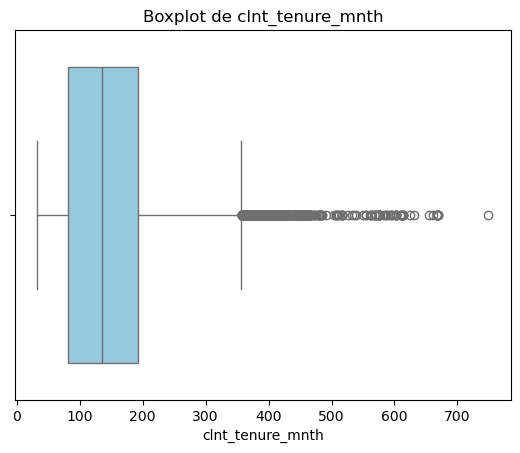

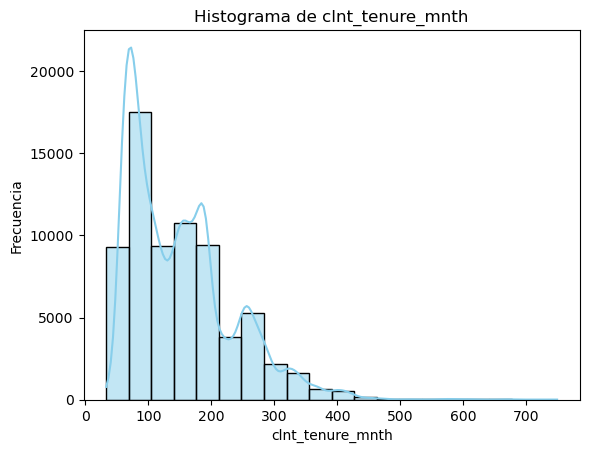

'En este caso, los resultados son análogos a la variable clnt_tenure_yr'

In [11]:
#clnt_tenure_mnth: how long the client has been with Vanguard (MONTHS)
f.basic_stat(df_finall_num,'clnt_tenure_mnth',True,20)
'''En este caso, los resultados son análogos a la variable clnt_tenure_yr'''

ANÁLISIS DE VARIABLE: clnt_age 

media: 46.442240133722414 
 mediana: 47.0 
 moda: 58.5
 varianza: 243.08778114182405
 desviación estándar: 15.59127259532794
 rango:82.5
 rango intercuartil: 26.5 
 Asimetría: 0.08182349158703761 
 Curtosis: -0.9271048487356293


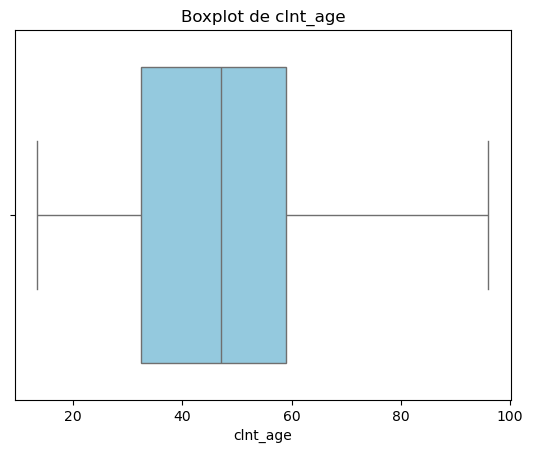

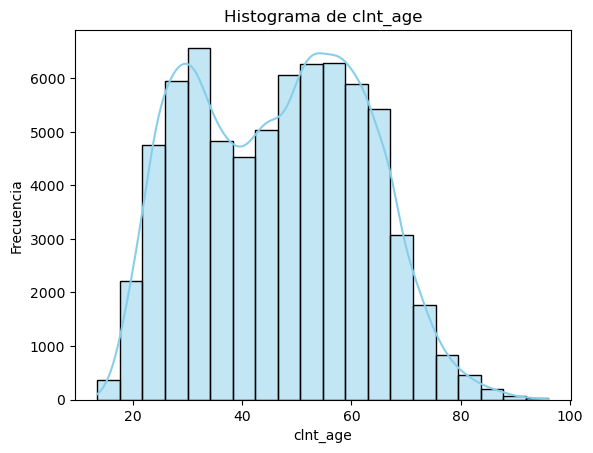

'La edad de los clientes tiene dos grandes concentraciones, una alrededor de los 30, y una más a los 50, siendo mayor \nesta última. En este caso, no existen valores atípicos, considerando la naturaleza de la variable.\nCon una asimetría a penas arriba del 0, se señala una ligera asimetría positiva (izquierda). Además, la curtosis negativa es\notro indicativo de cómo los datos se reparten el los rangos de edad (curva platicúrtica).\n'

In [12]:
#clnt_age: the age of the client.
f.basic_stat(df_finall_num,'clnt_age',True,20)
'''La edad de los clientes tiene dos grandes concentraciones, una alrededor de los 30, y una más a los 50, siendo mayor 
esta última. En este caso, no existen valores atípicos, considerando la naturaleza de la variable.
Con una asimetría a penas arriba del 0, se señala una ligera asimetría positiva (izquierda). Además, la curtosis negativa es
otro indicativo de cómo los datos se reparten el los rangos de edad (curva platicúrtica).
'''

ANÁLISIS DE VARIABLE: bal 

media: 147446.7265281752 
 mediana: 63334.59 
 moda: 31188.62
 varianza: 90908632017.218
 desviación estándar: 301510.5835907224
 rango:16306250.73
 rango intercuartil: 100199.51999999999 
 Asimetría: 11.164302129665488 
 Curtosis: 278.2039860394955


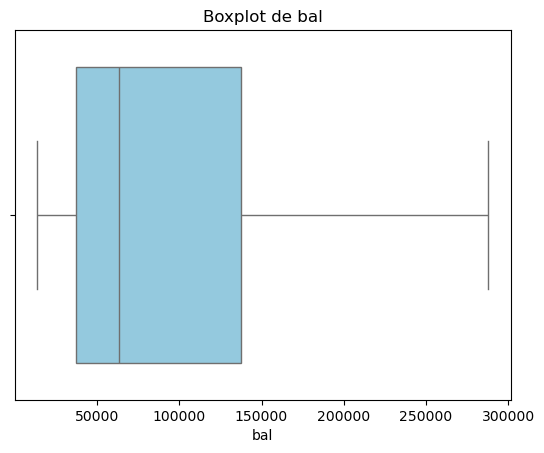

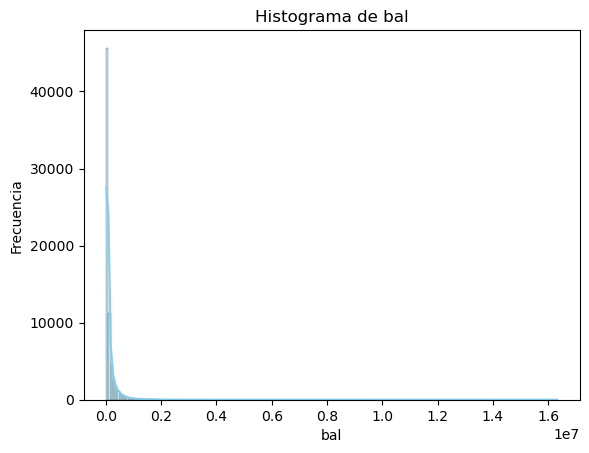

'\nObservando el rango y la desviación estándar, se observa la importante presencia de valores atípicos, correspondiente a aquellos\nbalances con sumas superiores a las 300k unidades monetarias. En este caso una asimetría positiva refleja la concentración de datos\na la izquierda, cercanos a la media. Si se requiere profundizar, se recomienda analizar por separado estos valores atípicos. \n'

In [13]:
#bal: total balance spread across all accounts for a particular client
f.basic_stat(df_finall_num,'bal',False,200)
'''
Observando el rango y la desviación estándar, se observa la importante presencia de valores atípicos, correspondiente a aquellos
balances con sumas superiores a las 300k unidades monetarias. En este caso una asimetría positiva refleja la concentración de datos
a la izquierda, cercanos a la media. Si se requiere profundizar, se recomienda analizar por separado estos valores atípicos. 
'''

ANÁLISIS DE VARIABLE: calls_6_mnth 

media: 3.382468765050854 
 mediana: 3.0 
 moda: 6.0
 varianza: 5.002356371646623
 desviación estándar: 2.2365948161539277
 rango:7.0
 rango intercuartil: 5.0 
 Asimetría: 0.051141800934866845 
 Curtosis: -1.3256714399170726


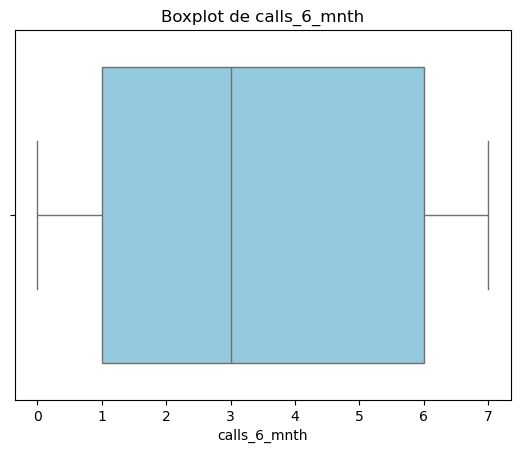

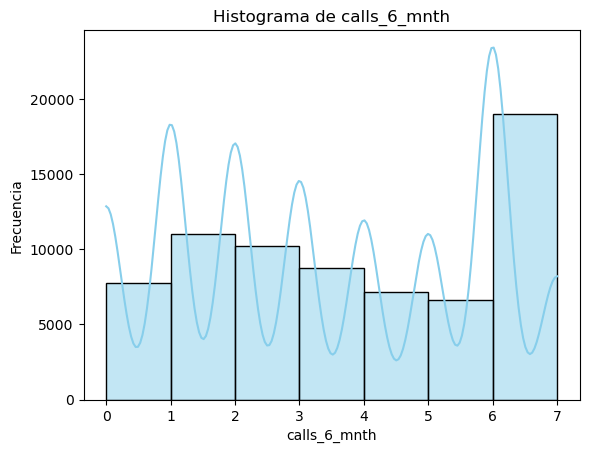

'\nDe esta variable tampoco se observan valores atípicos. Se aprecia que es común el servicio telefónico entre los clientes, con\nal menos una llamada cada dos meses. \n'

In [14]:
#calls_6_mnth: cantidad de veces que el cliente se comunicó mediante una llamada en los últimos seis meses.
f.basic_stat(df_finall_num,'calls_6_mnth',True,7)
'''
De esta variable tampoco se observan valores atípicos. Se aprecia que es común el servicio telefónico entre los clientes, con
al menos una llamada cada dos meses. 
'''

ANÁLISIS DE VARIABLE: logons_6_mnth 

media: 5.566719551236649 
 mediana: 5.0 
 moda: 9.0
 varianza: 5.538003072737695
 desviación estándar: 2.353296214406018
 rango:8.0
 rango intercuartil: 3.0 
 Asimetría: -0.03442606117380175 
 Curtosis: -1.0607568785264696


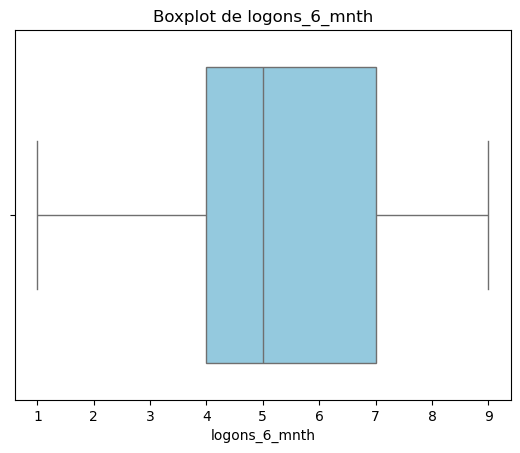

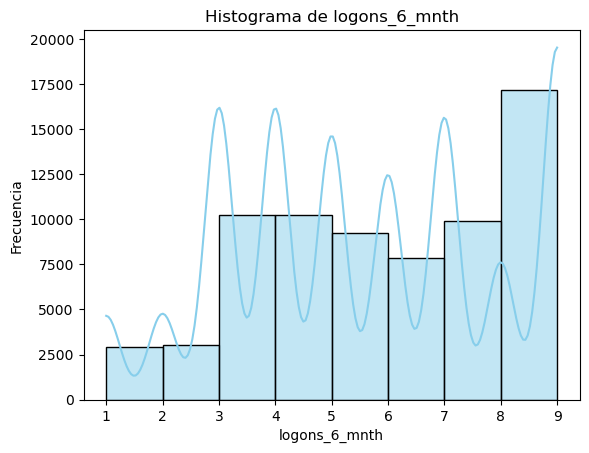

'\nEn esta variable no se observan valores atípicos. Con la moda en 9, los datos se hallan distribuidos en una curva \nplaticúrtica, como lo indica la curtosis negativa, y con una asimetría negativa (derecha). \n'

In [15]:
#logons_6_mnth: cantidad de veces que el cliente se comunicó mediante una llamada en los últimos seis meses.
f.basic_stat(df_finall_num,'logons_6_mnth',True,8)
'''
En esta variable no se observan valores atípicos. Con la moda en 9, los datos se hallan distribuidos en una curva 
platicúrtica, como lo indica la curtosis negativa, y con una asimetría negativa (derecha). 
'''

### EDA univariable categóricas

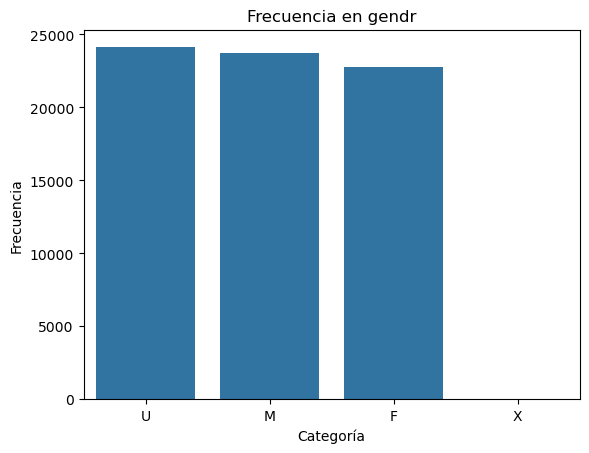

'\nSe observa que más de un tercio de los datos no tienen un género definido. \n'

In [16]:
f.categ_basic_stat(df_finall_cat,'gendr')
'''
Se observa que más de un tercio de los datos no tienen un género definido. 
'''

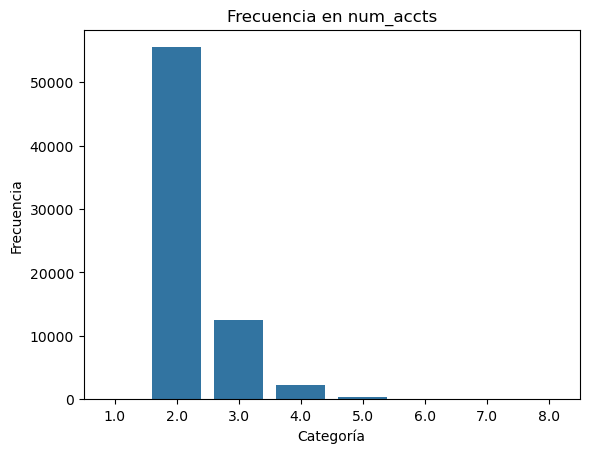

'\nSe observa cómo los clientes tienen 2 cuentas al menos, y una porción menos común con entre 5 y 8 cuentas.\n'

In [17]:
f.categ_basic_stat(df_finall_cat,'num_accts')
'''
Se observa cómo los clientes tienen 2 cuentas al menos, y una porción menos común con entre 5 y 8 cuentas.
'''

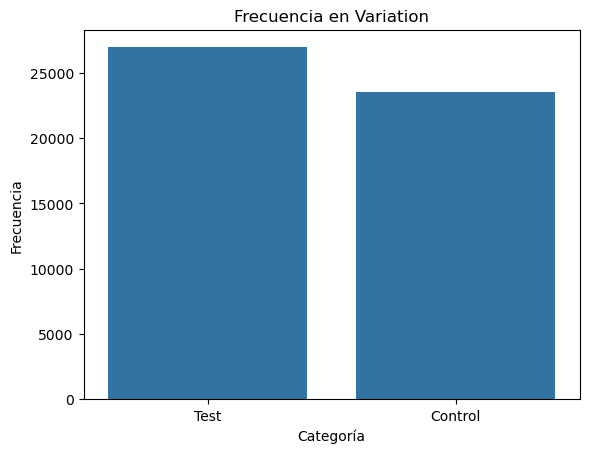

,Variation,count
0,Test,26968
1,Control,23532


In [18]:
f.categ_basic_stat(df_experiment_clients,'Variation') #Inspección de los clientes que realizaron el test


## Análisis de la aplicación del test

#### Para realizar el análisis de cómo se aplicó la prueba para el sitio web, se analiza la muestra seleccionada. Para ello, se utilizan los dataframe resultas del análisis previo. 

In [19]:
import pandas as pd
df_final_completo=pd.read_csv("Data/raw/finalcompleto.csv")

#control (antigua): 26959
#test (nueva): 31572
#Población: 70594

In [20]:
#Selecciona dentro del dataframe principal los clientres no registados en el test
df_final_completo.loc[df_final_completo["Variation"].isna()].sample(10)

#De todos estos registros no se podrán sacar conclusiones, dado que no se conoce en cuál de los dos
#sitios web han realizado su navegación. 

,visit_id,confirm_count,start_count,step_1_count,step_2_count,step_3_count,confirm_time,start_time,step_1_time,step_2_time,...,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,start_time_error,confirm_time_error,step_1_time_error,step_2_time_error,step_3_error
19280,3139311_33422227745_708959,1,0,0,0,1,0.0,0.0,0.0,0.0,...,2.0,23118.71,4.0,4.0,NaN,False,False,False,False,False
72287,895004768_68057033645_531589,0,1,1,2,0,0.0,23.0,131.0,267.0,...,2.0,31313.20,3.0,3.0,NaN,False,False,False,False,False
55426,709371922_9449706006_364476,0,2,1,0,0,0.0,63.0,0.0,0.0,...,2.0,98053.73,7.0,7.0,NaN,False,False,False,False,False
7377,181246586_38201243680_435920,1,0,1,1,1,0.0,0.0,13.0,37.0,...,2.0,20367.92,1.0,1.0,NaN,False,False,False,False,False
61357,77430036_12959783432_531196,1,1,1,1,1,0.0,147.0,37.0,45.0,...,2.0,174170.35,7.0,7.0,NaN,False,False,False,False,False
16691,285011165_65185657328_864897,1,1,1,1,1,0.0,19.0,28.0,72.0,...,2.0,29395.37,3.0,3.0,NaN,False,False,False,False,False
30960,442203383_34235089079_286034,1,1,1,1,1,0.0,40.0,17.0,62.0,...,2.0,72210.92,7.0,7.0,NaN,False,False,False,False,False
40239,544116165_97051220265_583306,0,1,1,0,0,0.0,45.0,0.0,0.0,...,2.0,71756.19,2.0,2.0,NaN,False,False,False,False,False
2078,1226888_10750025576_943351,0,1,1,1,1,0.0,11.0,81.0,18.0,...,2.0,82142.88,2.0,2.0,NaN,False,False,False,False,False
71988,891828236_47346666637_49195,2,2,2,2,2,320.0,2.5,27.5,87.0,...,2.0,138570.79,7.0,7.0,NaN,False,False,False,False,False


In [21]:
df_final_completo.loc[df_final_completo["bal"]>1000000]

,visit_id,confirm_count,start_count,step_1_count,step_2_count,step_3_count,confirm_time,start_time,step_1_time,step_2_time,...,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,start_time_error,confirm_time_error,step_1_time_error,step_2_time_error,step_3_error
19,10024125_38177552152_999695,0,2,1,0,0,0.0,10.5,0.0,0.0,...,3.0,2508197.52,4.0,7.0,Control,False,False,False,False,False
45,100618014_41463020246_787063,1,2,1,0,0,46.0,242.5,0.0,0.0,...,2.0,1634893.88,6.0,9.0,Test,False,False,False,False,False
52,100696989_79957693336_140112,0,1,1,0,0,0.0,4.0,0.0,0.0,...,3.0,1776167.77,6.0,9.0,Control,False,False,False,False,False
63,100787296_75463077257_149957,1,2,1,2,2,0.0,13.5,10.0,121.0,...,2.0,1153501.04,3.0,3.0,NaN,False,False,False,False,False
86,10111418_59591388284_939024,1,2,2,2,1,0.0,111.5,25.5,115.0,...,3.0,8045102.60,6.0,9.0,Test,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81712,998145295_95988643835_524944,0,3,1,1,1,0.0,74.5,78.0,44.0,...,3.0,1260868.55,6.0,9.0,Test,False,False,False,False,False
81787,999009481_48603974844_436498,1,1,2,1,1,11.0,8.0,51.0,123.0,...,3.0,1060902.15,6.0,6.0,NaN,False,False,False,False,False
81793,999054202_53456826814_552283,0,2,0,0,0,0.0,129.0,0.0,0.0,...,2.0,1277748.66,6.0,9.0,Test,False,False,False,False,False
81796,999066804_34223271414_790731,2,1,1,1,1,62.0,11.0,9.0,43.0,...,3.0,1878607.69,4.0,7.0,Test,False,False,False,False,False


### Muestra para TEST y CONTROL

In [22]:
df_test=pd.read_csv("Data/raw/test.csv")
df_control=pd.read_csv("Data/raw/control.csv")

#### División de variables numéricas y variables categóricas

In [23]:
df_test_num = df_test[['confirm_count', 'start_count', 'step_1_count', 'confirm_time', 'start_time', 
                       'step_1_time', 'step_2_time', 'step_3_time', 'step_2_count', 'step_3_count', 
                       'failure_rate', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                       'bal', 'calls_6_mnth', 'logons_6_mnth']]

# Selección de columnas categóricas
df_test_categ = df_test[['visit_id', 'client_id', 'visitor_id', 'gendr']]

In [24]:
df_control_num = df_control[['confirm_count', 'start_count', 'step_1_count', 'confirm_time', 'start_time', 
                       'step_1_time', 'step_2_time', 'step_3_time', 'step_2_count', 'step_3_count', 
                       'failure_rate', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                       'bal', 'calls_6_mnth', 'logons_6_mnth']]

# Selección de columnas categóricas
df_control_categ = df_control[['visit_id', 'client_id', 'visitor_id', 'gendr']]

#### Comparación de los datos generales de los clientes: Muestra general / Test / Control 

En este apartado se pueden observar las comparaciones entre los valores de las variables que caracterizan a los clientes, como su edad, antigüedad en el banco, número de cuentas, balance, entre otras.

El objetivo es demostrar que las muestras elegidas para realizar las pruebas con el sitio web nuevo y el sitio web previo, son verdaderamente representativas. Para ello, se calculan las estadísticas básicas para las variables en las muestras general (azul), muestra en sitio web nuevo (verde), y muestra en sitio web previo (rosa).

ANÁLISIS DE VARIABLE: clnt_tenure_yr
  DataFrame 1 - media: 12.053007337734085 | mediana: 11.0 | moda: 6.0 | varianza: 47.222325819018934 | desviación estándar: 6.8718502471327865 | rango: 60.0 | rango intercuartil: 10.0 | Asimetría: 1.0366247018480386 | Curtosis: 1.0709232170805043
  DataFrame 2 - media: 12.190922623760809 | mediana: 11.0 | moda: 5.0 | varianza: 48.287885418216725 | desviación estándar: 6.948948511697056 | rango: 53.0 | rango intercuartil: 10.0 | Asimetría: 1.0066577232221314 | Curtosis: 0.9143659793590526
  DataFrame 3 - media: 12.292184428205793 | mediana: 11.0 | moda: 6.0 | varianza: 49.094274918723336 | desviación estándar: 7.006730686898372 | rango: 53.0 | rango intercuartil: 10.0 | Asimetría: 0.9830831246109331 | Curtosis: 0.8154461978149983


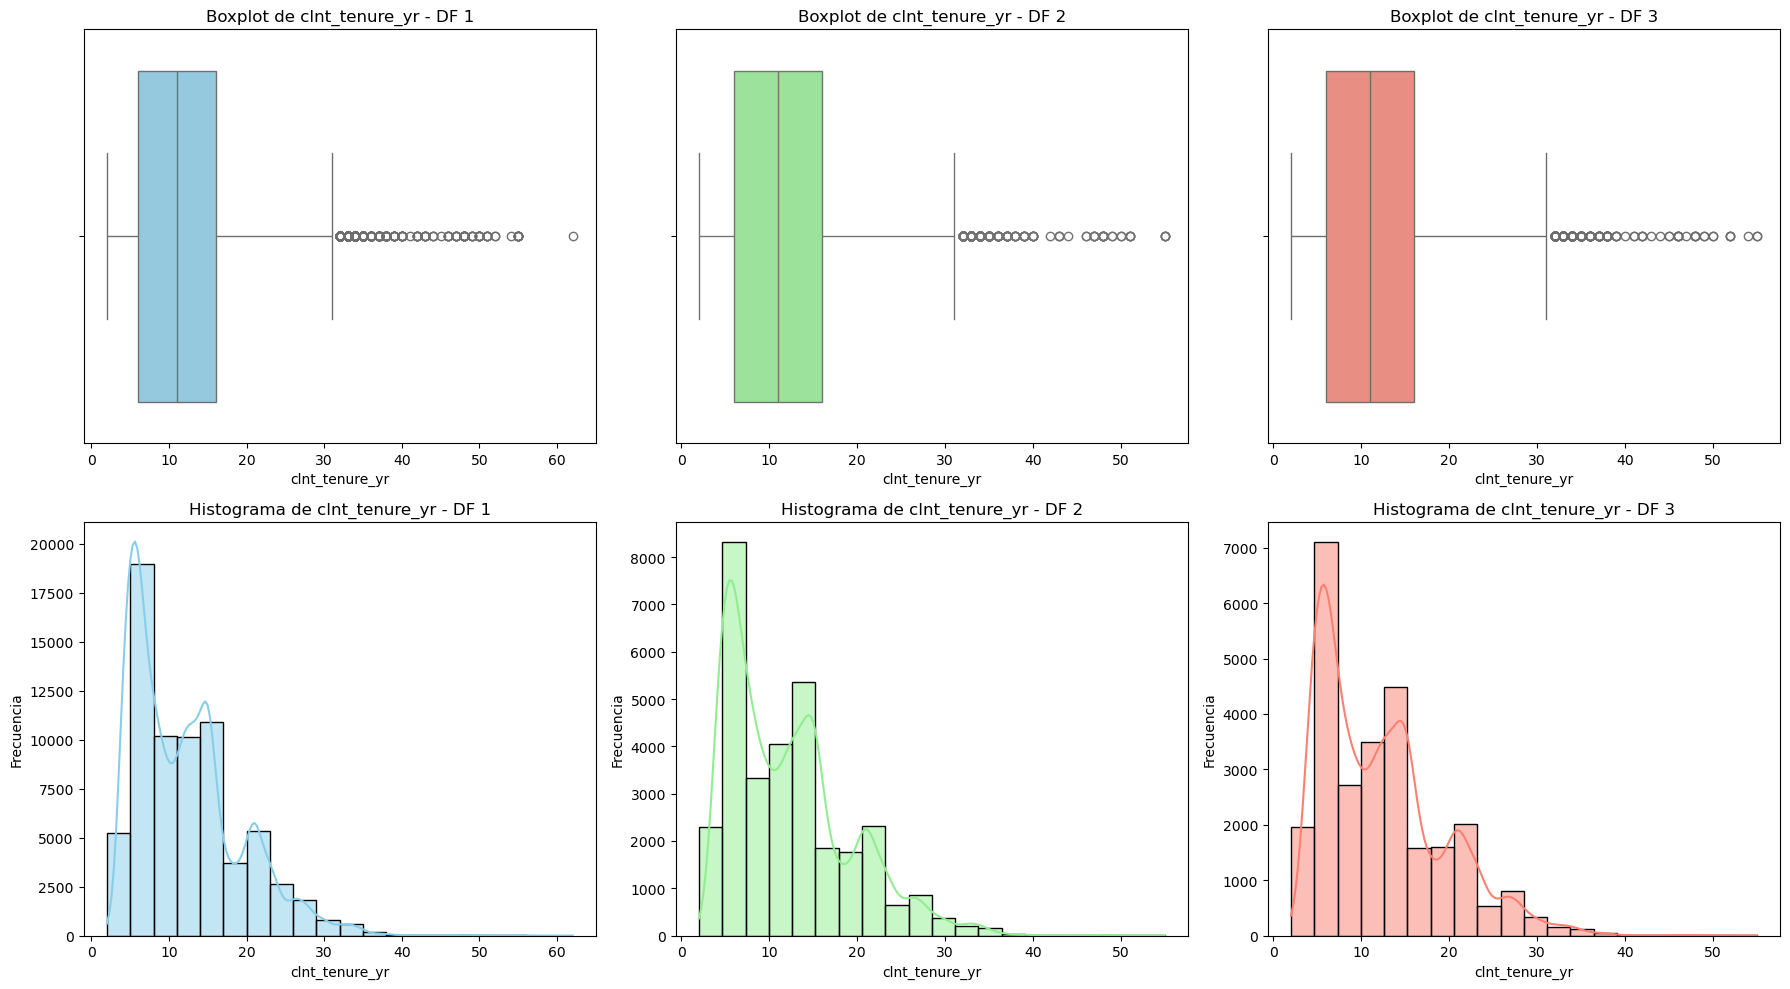

In [25]:
f.basic_stat_comparison([df_finall_num, df_test_num, df_control_num],'clnt_tenure_yr', show_outliers=True, bins=20)

ANÁLISIS DE VARIABLE: clnt_age
  DataFrame 1 - media: 46.442240133722414 | mediana: 47.0 | moda: 58.5 | varianza: 243.08778114182405 | desviación estándar: 15.59127259532794 | rango: 82.5 | rango intercuartil: 26.5 | Asimetría: 0.08182349158703761 | Curtosis: -0.9271048487356293
  DataFrame 2 - media: 48.356459633230926 | mediana: 49.5 | moda: 62.5 | varianza: 245.2722182648468 | desviación estándar: 15.661169121902962 | rango: 79.0 | rango intercuartil: 26.0 | Asimetría: 0.0136876680067442 | Curtosis: -0.9388164359604905
  DataFrame 3 - media: 48.46410950773454 | mediana: 49.5 | moda: 58.5 | varianza: 247.40475315138306 | desviación estándar: 15.729105287694626 | rango: 79.0 | rango intercuartil: 26.5 | Asimetría: 0.016712119284489766 | Curtosis: -0.9324750446278891


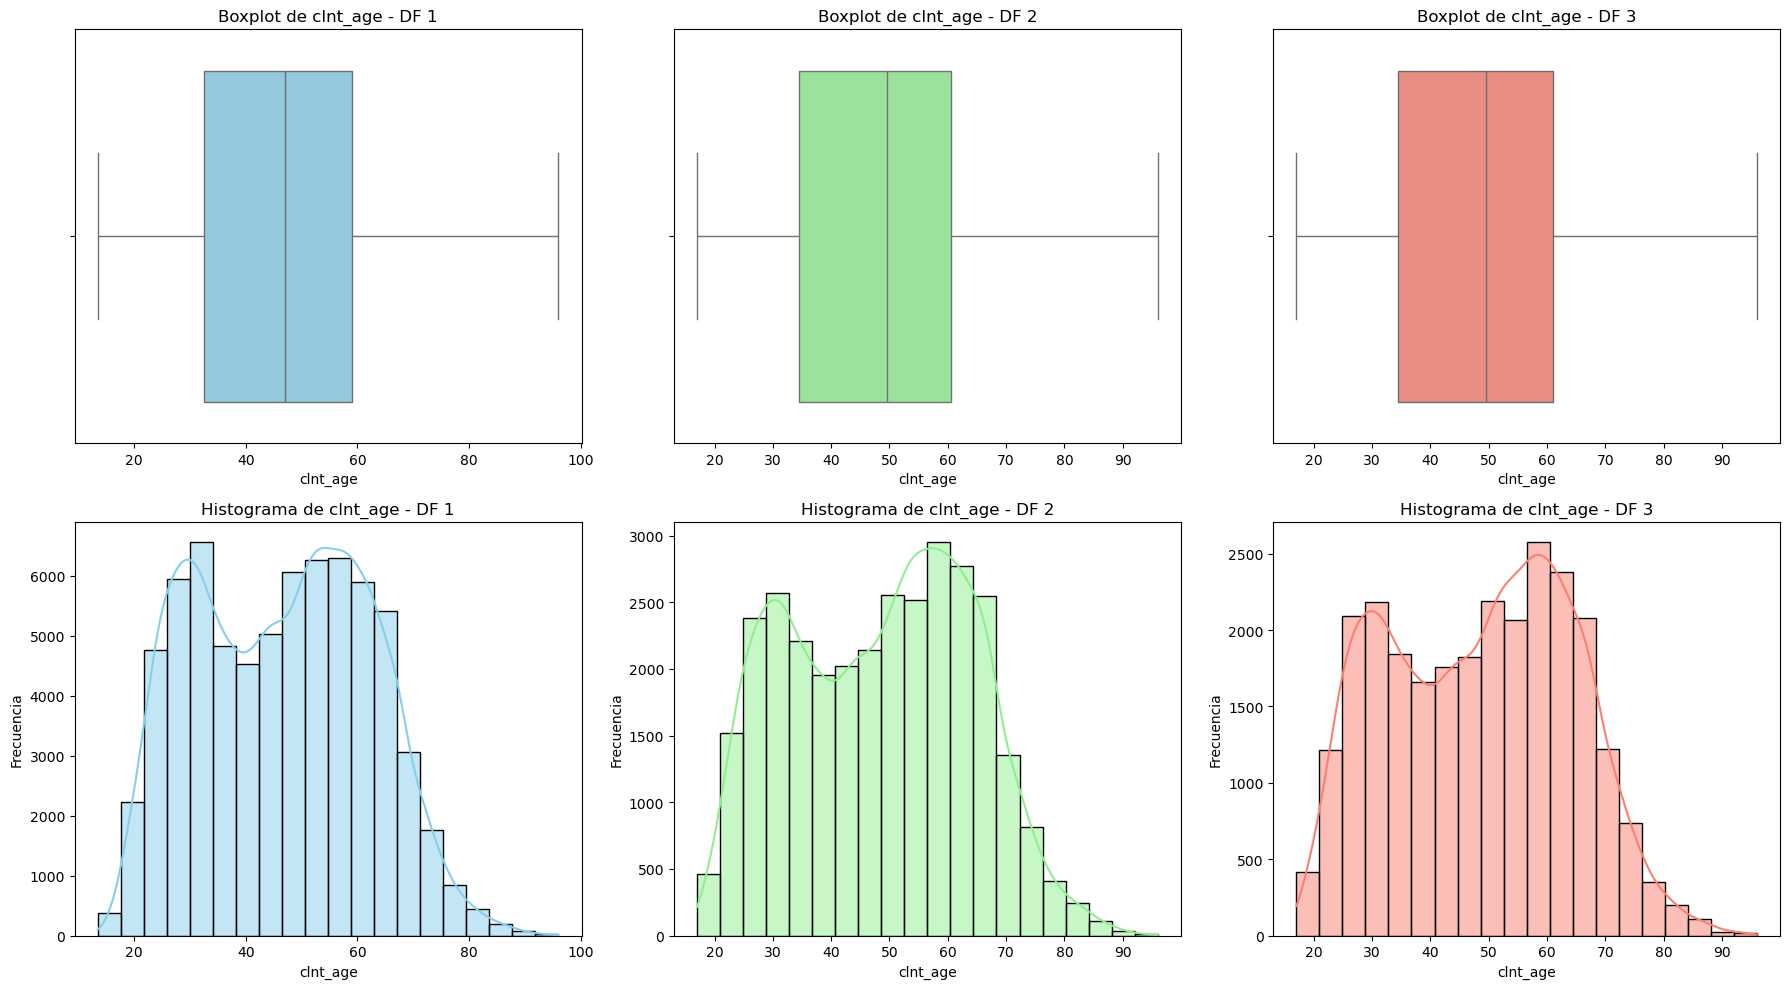

In [26]:
f.basic_stat_comparison([df_finall_num, df_test_num, df_control_num],'clnt_age', show_outliers=True, bins=20)

ANÁLISIS DE VARIABLE: bal
  DataFrame 1 - media: 147446.7265281752 | mediana: 63334.59 | moda: 31188.62 | varianza: 90908632017.218 | desviación estándar: 301510.5835907224 | rango: 16306250.73 | rango intercuartil: 100199.51999999999 | Asimetría: 11.164302129665488 | Curtosis: 278.2039860394955
  DataFrame 2 - media: 160986.5364628005 | mediana: 68735.17 | moda: 126442.72 | varianza: 132538998690.03639 | desviación estándar: 364059.05934344826 | rango: 16296250.71 | rango intercuartil: 110164.9 | Asimetría: 18.60300546780527 | Curtosis: 670.826101793223
  DataFrame 3 - media: 161644.57157090394 | mediana: 69675.26 | moda: 53955.97 | varianza: 95621168117.35681 | desviación estándar: 309226.7260722411 | rango: 7718204.399999999 | rango intercuartil: 111431.84999999998 | Asimetría: 7.844445997257618 | Curtosis: 101.85361935979488


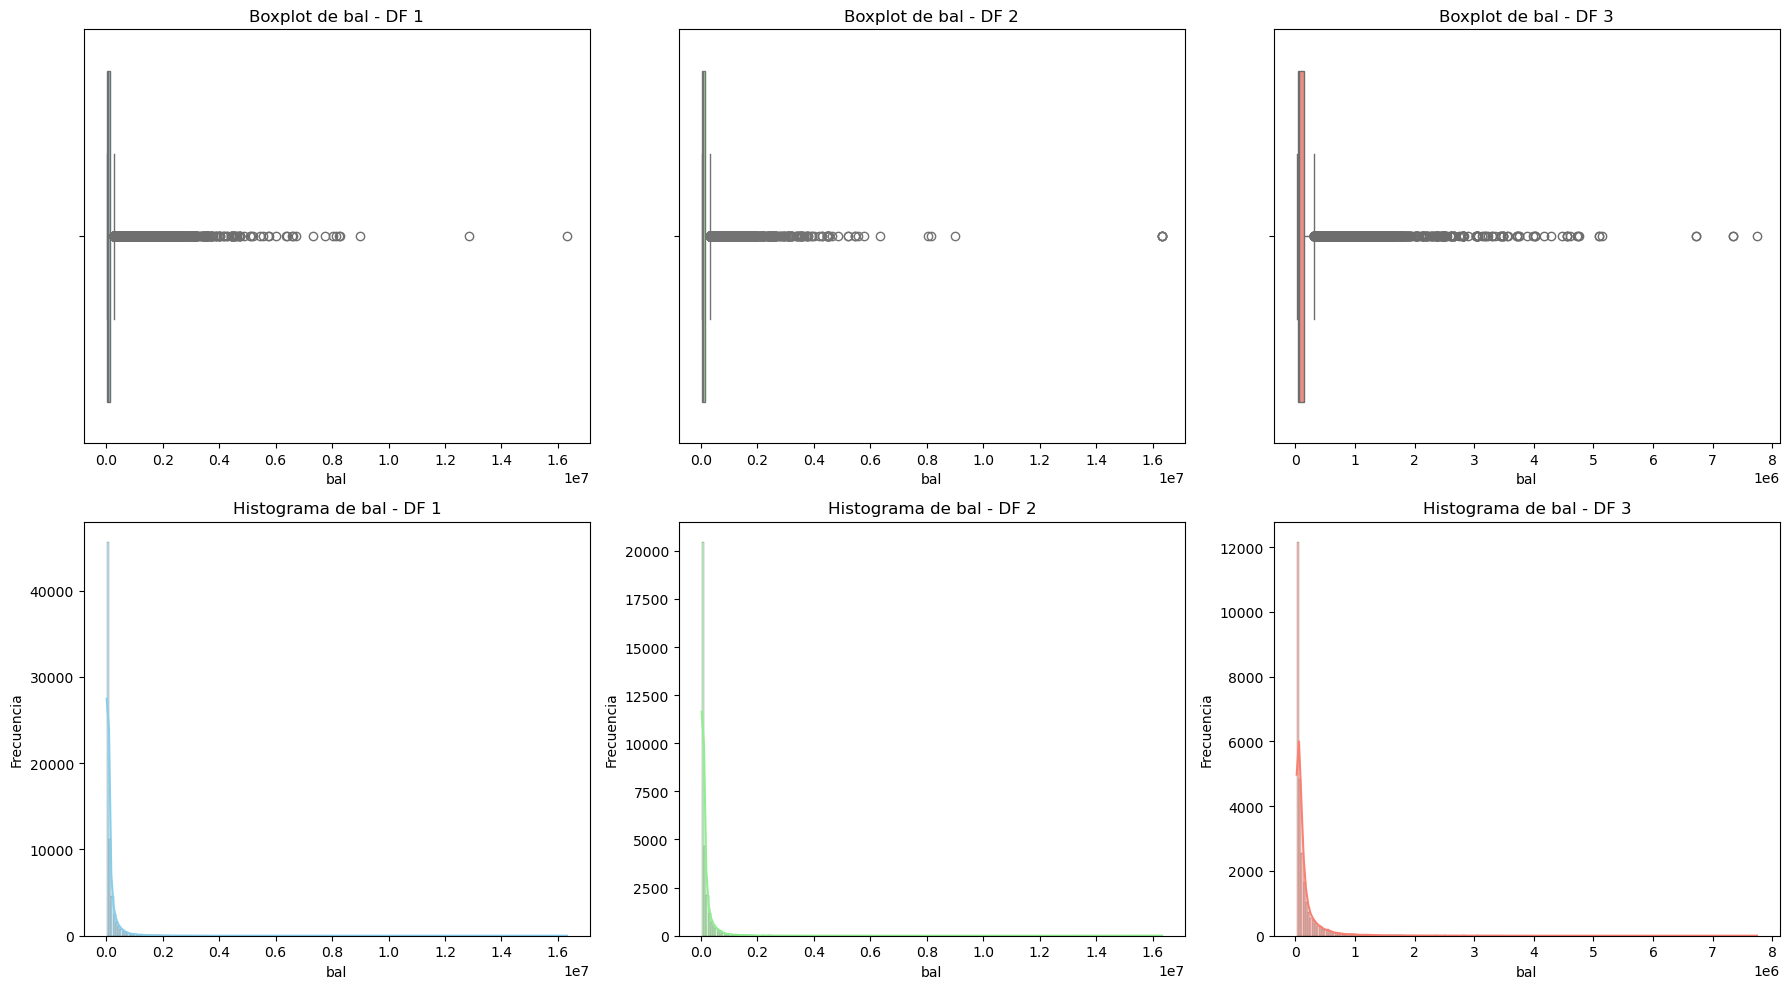

In [27]:
f.basic_stat_comparison([df_finall_num, df_test_num, df_control_num],'bal', show_outliers=True, bins=200)

ANÁLISIS DE VARIABLE: calls_6_mnth
  DataFrame 1 - media: 3.382468765050854 | mediana: 3.0 | moda: 6.0 | varianza: 5.002356371646623 | desviación estándar: 2.2365948161539277 | rango: 7.0 | rango intercuartil: 5.0 | Asimetría: 0.051141800934866845 | Curtosis: -1.3256714399170726
  DataFrame 2 - media: 3.2068856301270072 | mediana: 3.0 | moda: 6.0 | varianza: 4.862302770302303 | desviación estándar: 2.20506298556352 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.027895735105133268 | Curtosis: -1.4582367930302085
  DataFrame 3 - media: 3.2974516858933938 | mediana: 3.0 | moda: 6.0 | varianza: 4.7898855601610455 | desviación estándar: 2.18858071821924 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.08588862213922727 | Curtosis: -1.4451862947719096


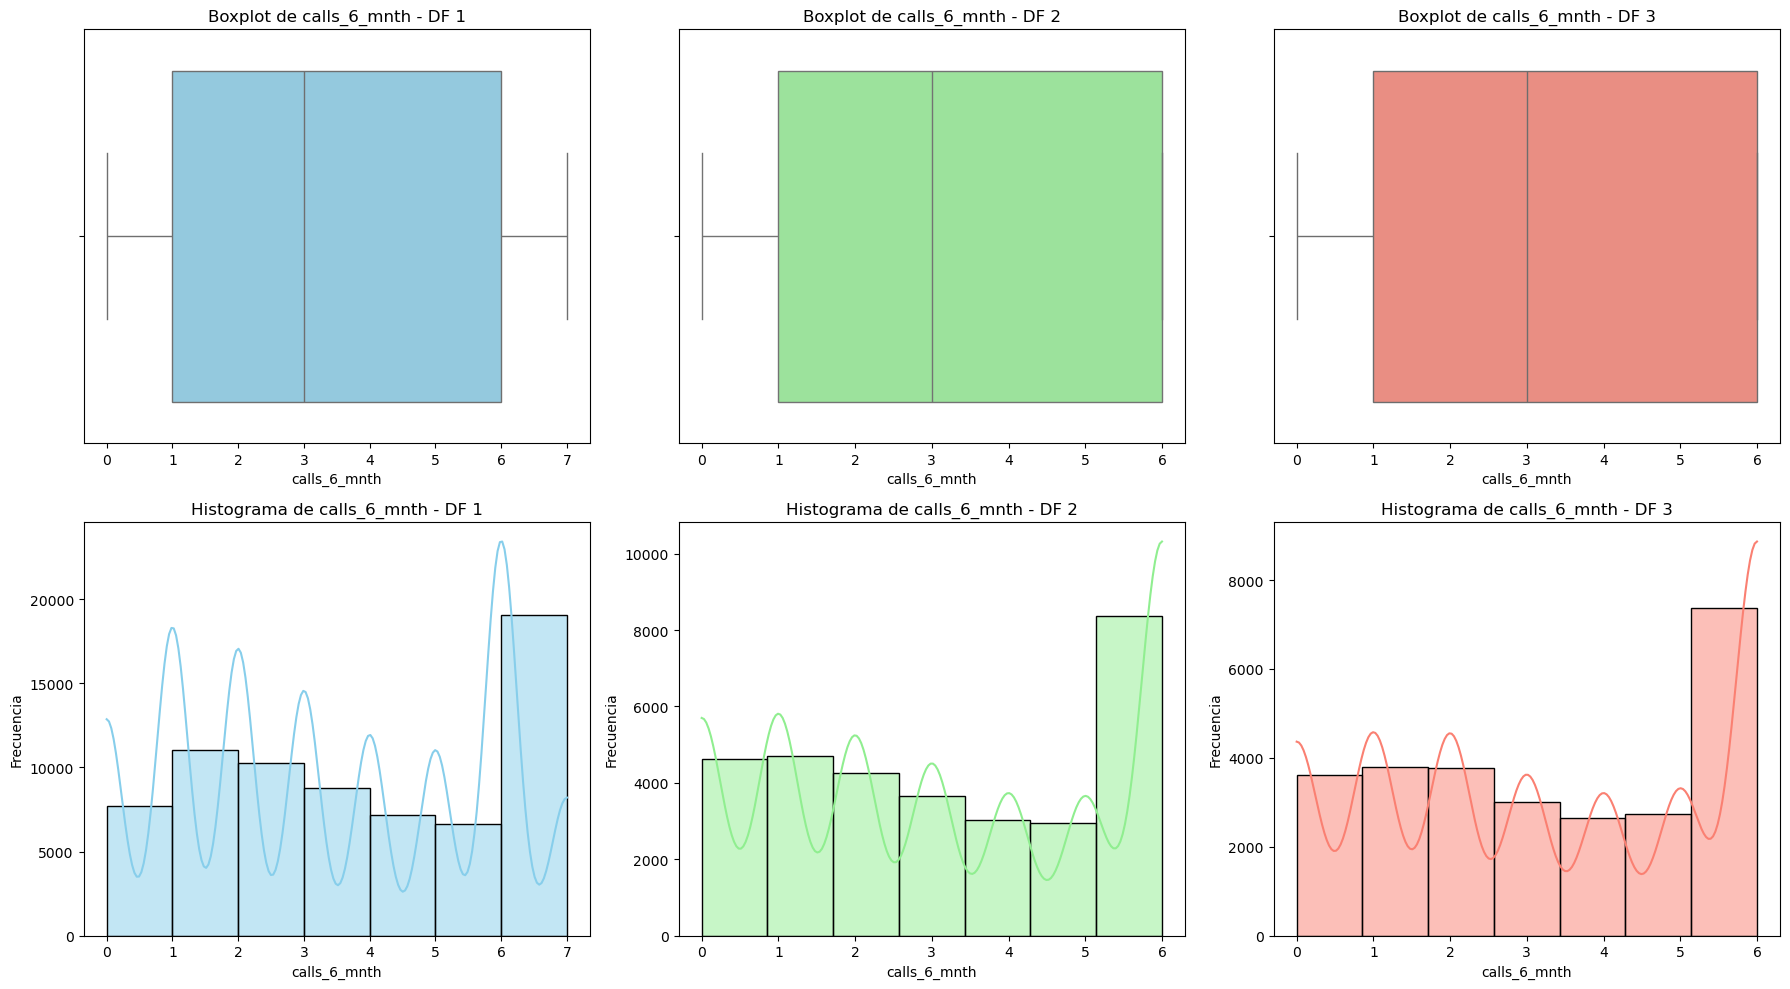

In [28]:
f.basic_stat_comparison([df_finall_num, df_test_num, df_control_num],'calls_6_mnth', show_outliers=True, bins=7)

ANÁLISIS DE VARIABLE: logons_6_mnth
  DataFrame 1 - media: 5.566719551236649 | mediana: 5.0 | moda: 9.0 | varianza: 5.538003072737695 | desviación estándar: 2.353296214406018 | rango: 8.0 | rango intercuartil: 3.0 | Asimetría: -0.03442606117380175 | Curtosis: -1.0607568785264696
  DataFrame 2 - media: 6.246001330250531 | mediana: 6.0 | moda: 9.0 | varianza: 4.800719234382616 | desviación estándar: 2.1910543659121324 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.04870926264893846 | Curtosis: -1.448423361536375
  DataFrame 3 - media: 6.333840275974628 | mediana: 6.0 | moda: 9.0 | varianza: 4.734380796654561 | desviación estándar: 2.1758632302271574 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.10544585306857072 | Curtosis: -1.4330050054626577


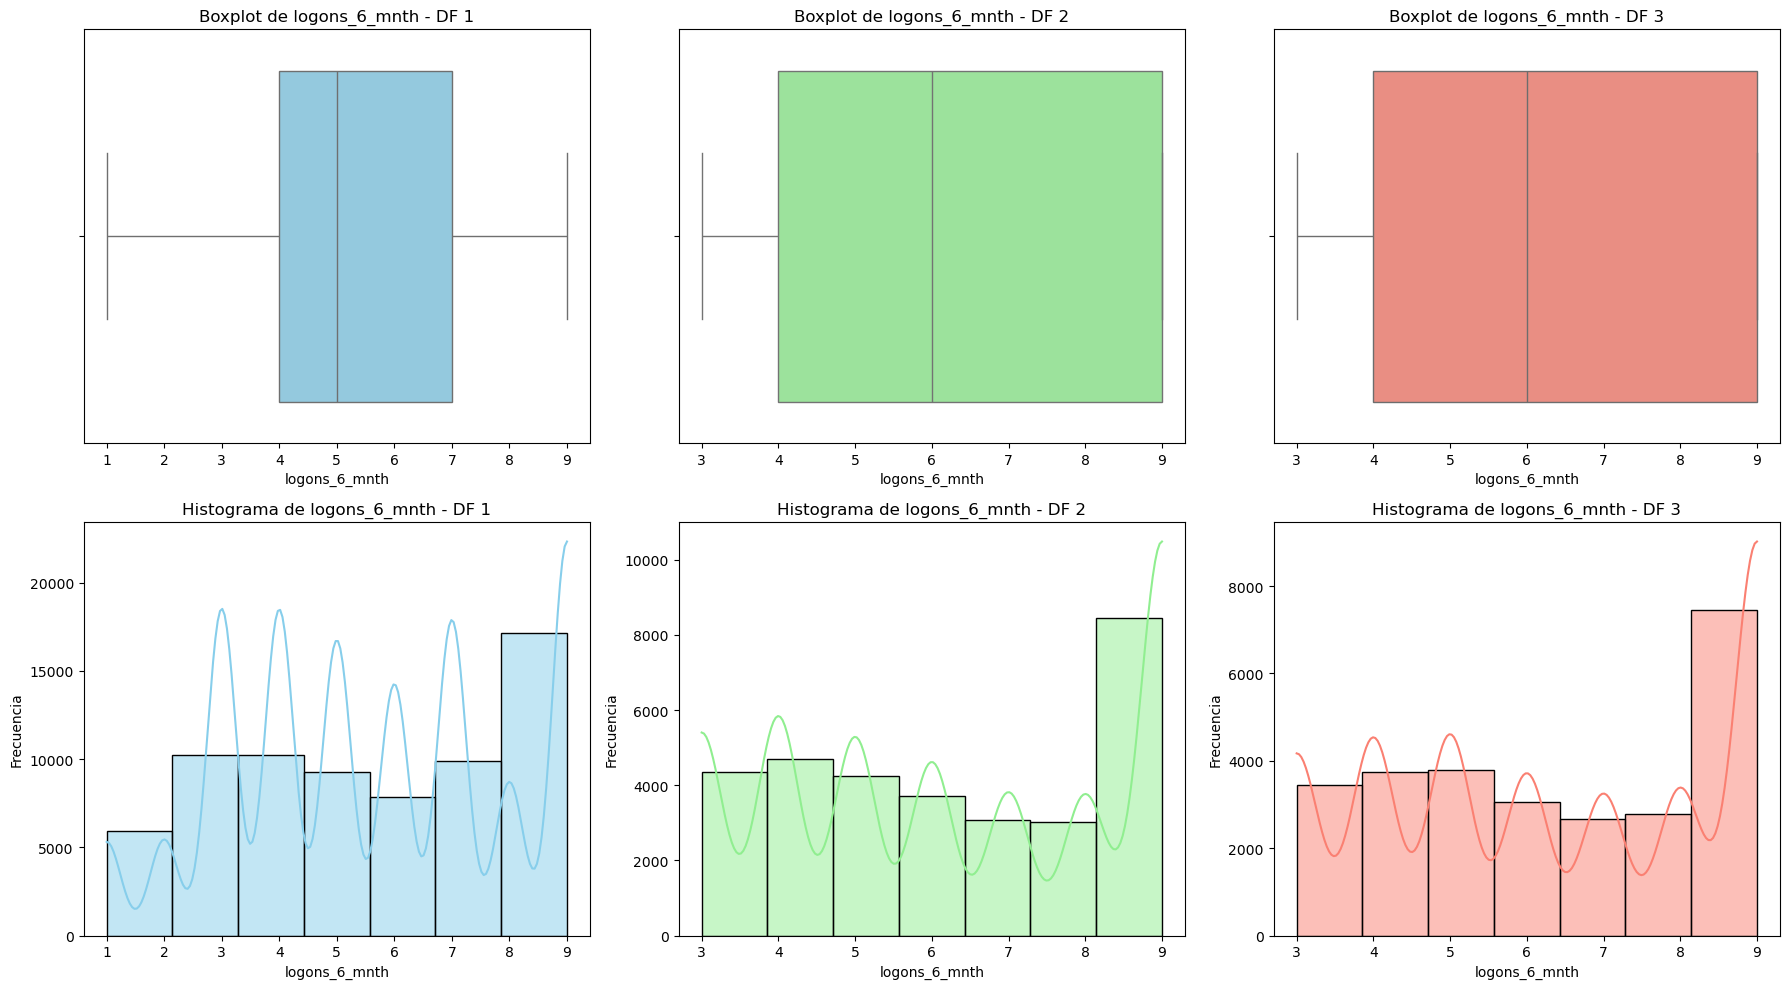

In [29]:
f.basic_stat_comparison([df_finall_num, df_test_num, df_control_num],'logons_6_mnth', show_outliers=True, bins=7)

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 1:
gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 2:
gendr
M    10624
U    10586
F    10361
X        2
Name: count, dtype: int64

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 3:
gendr
M    9310
U    9017
F    8632
Name: count, dtype: int64



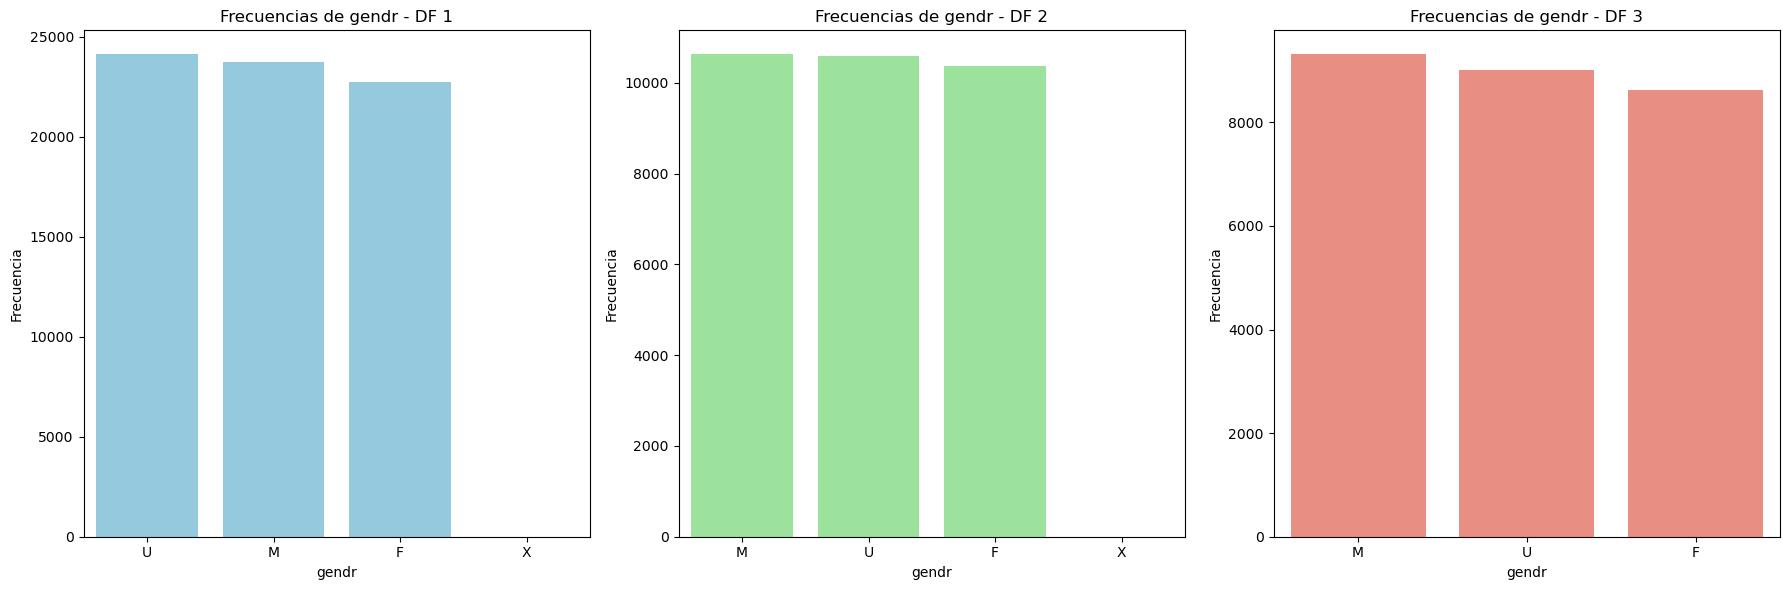

In [30]:
f.categorical_stat_comparison([df_finall_cat, df_test_categ, df_control_categ],'gendr')

### De manera general, se puede observar que las muestras de clientes en donde se aplicaron las pruebas para los sitios web, presentan leves variaciones con respecto a las características de la muestra principal.
Por ejemplo, la media de la edad en la muestra_test y la muestra_control, aumentan 4.11% y 4.34% respectivamente, en contraste con la muestra general. Minetras tanto, la desviación estándar se mantiene en valores de 15.6 y 15.7 años.

La variable con cambios más significativos entre las muestras es el balance. 

El balance tiene una variación entre las muestras, debida a la baja cantidad de clientes con sumas superiores a los 5 millones de unidades monetarias. Una opción para conocer mejor el comportamiento de este sector de los clientes, es realizar estudios por grupos de clientes, donde el estrato con mayor balance, podría delimitarse a patir del millón de unidades monetarias, alcanzando así una muestra de 1574 clientes. 

Por otro lado, el 34.17% de la muestra general tiene un género desconocido, característica heredada a las muestras test y control, hecho que reduce la población muestral cuando se analiza esta característica.

### En resumen, se considera que las muestras seleccionadas para ejecutar las pruebas en los sitios web sí son representativas de la muestra general.

## Análisis multivariable

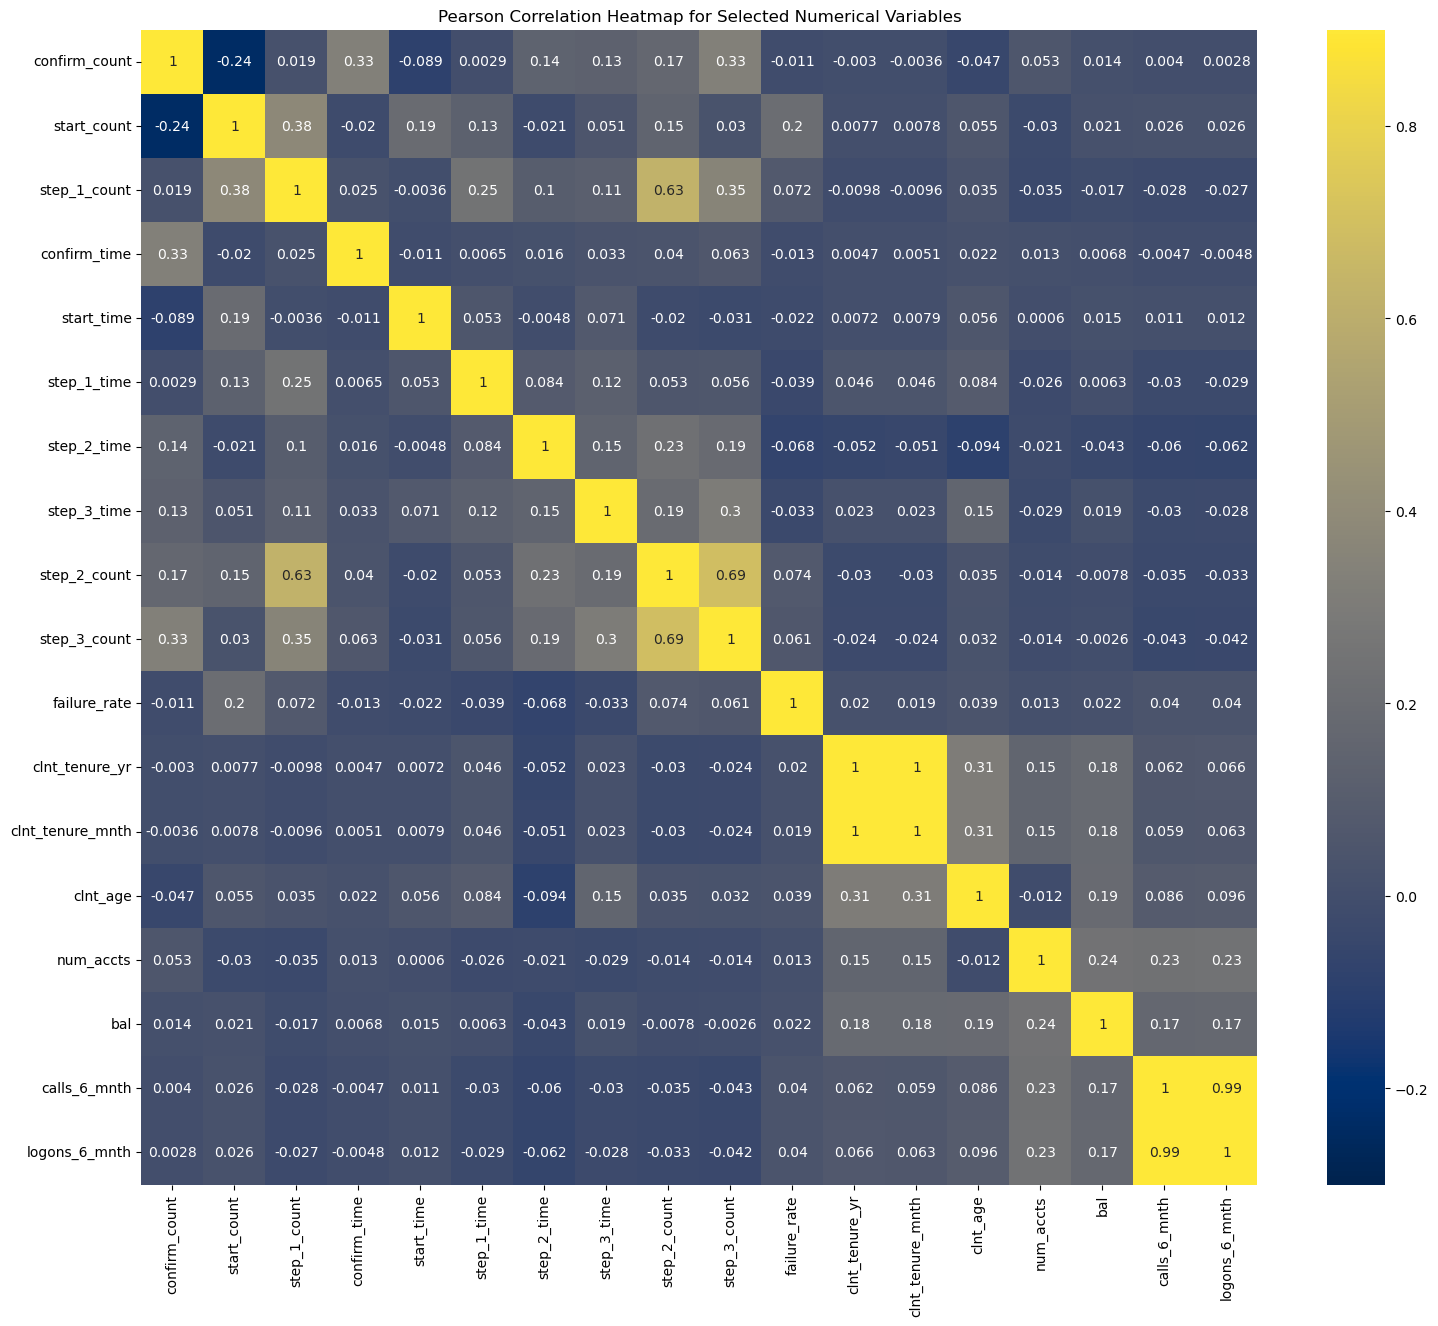

In [31]:
#MAPA DE CORRELACIÓN LINEAL ENTRE VARIABLES DE MUESTRA TEST
f.corr_map_pearson(df_test_num,-0.3,0.9)

De la correlación lineal entre las variables de la muestra TEST, se destaca una posible correlación entre :


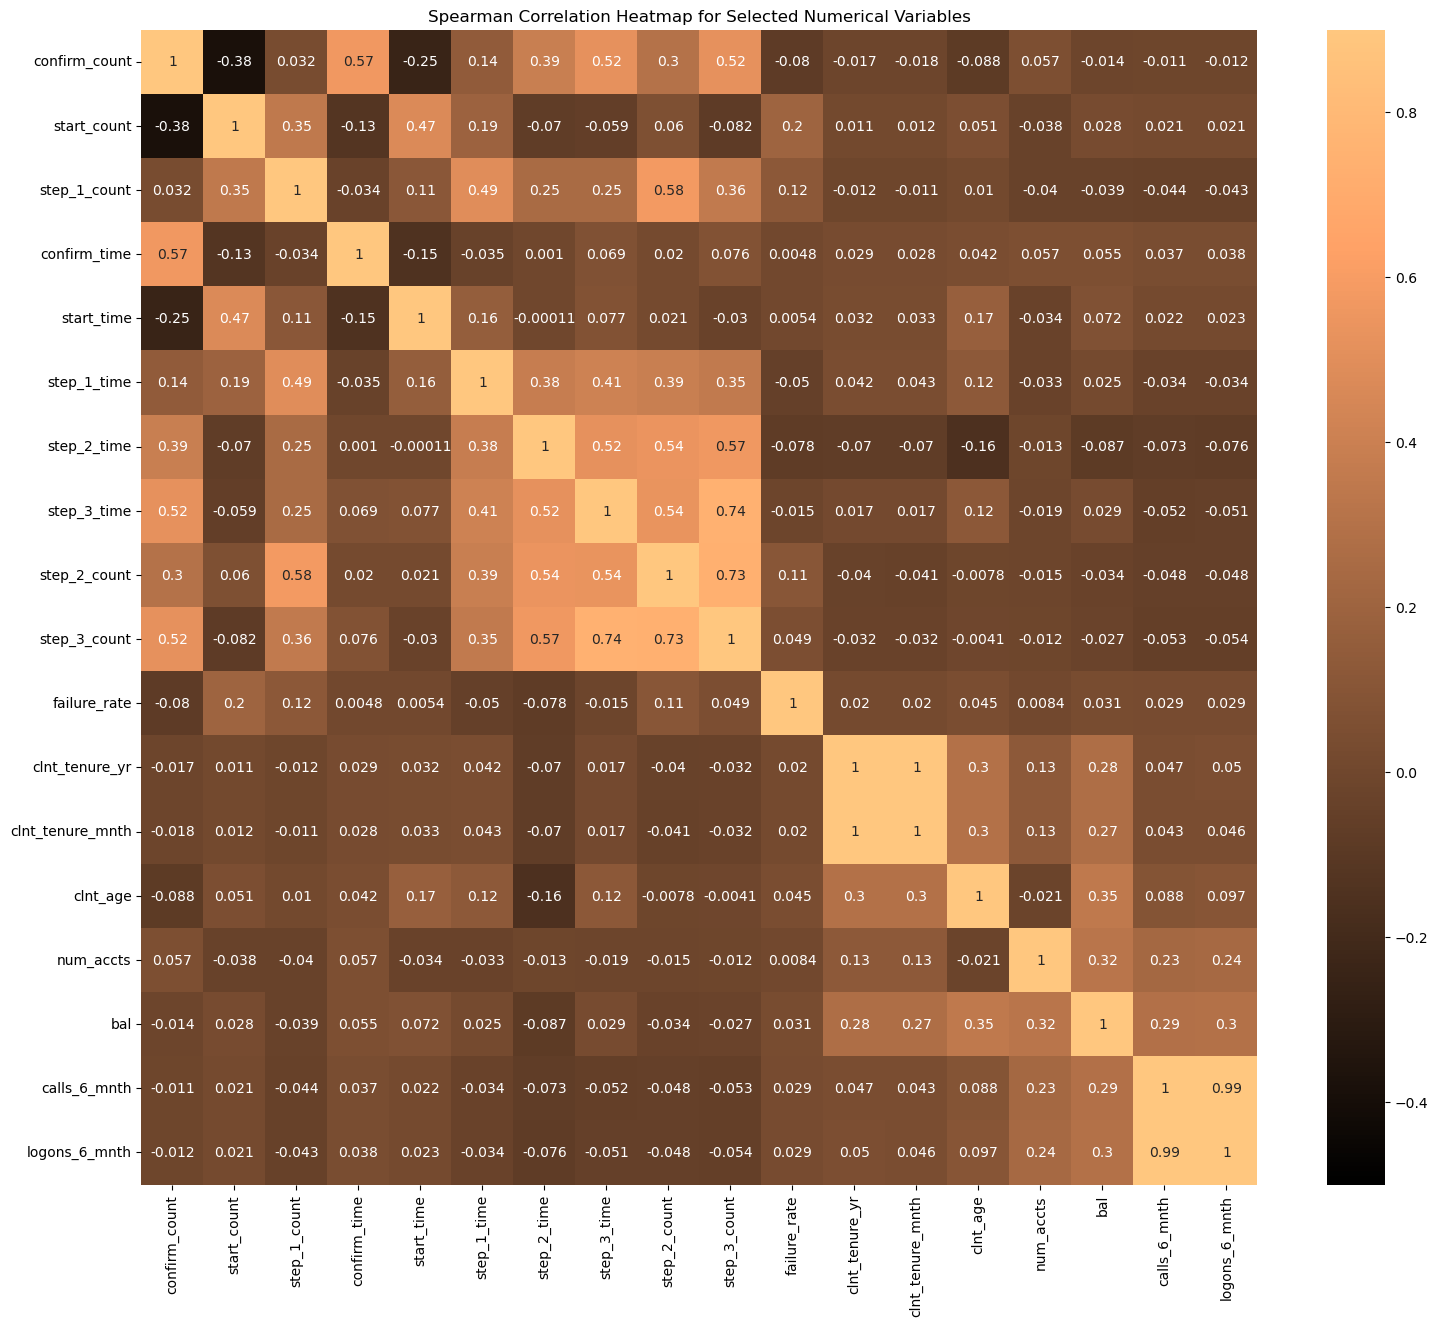

In [34]:
f.corr_map_spearman(df_test_num,-0.5,0.9)

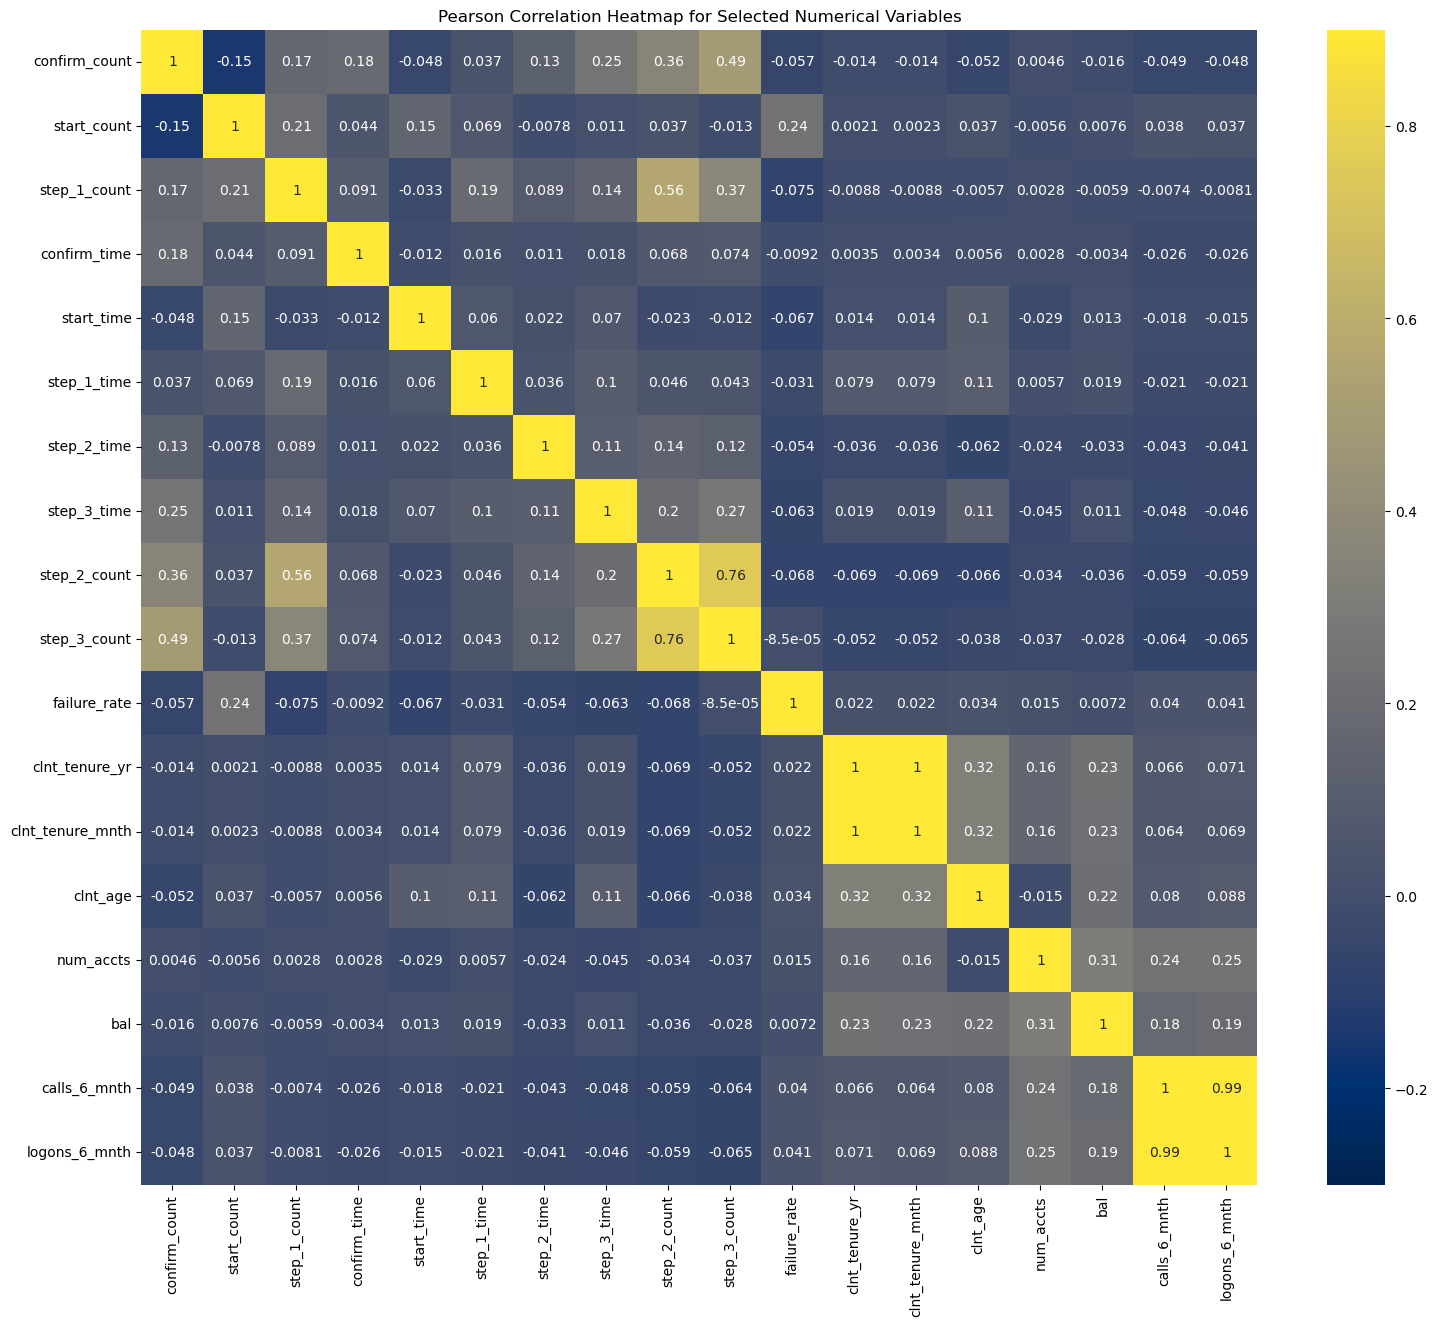

In [32]:
#MAPA DE CORRELACIÓN LINEAL ENTRE VARIABLES DE MUESTRA CONTROL
f.corr_map_pearson(df_control_num,-0.3,0.9)

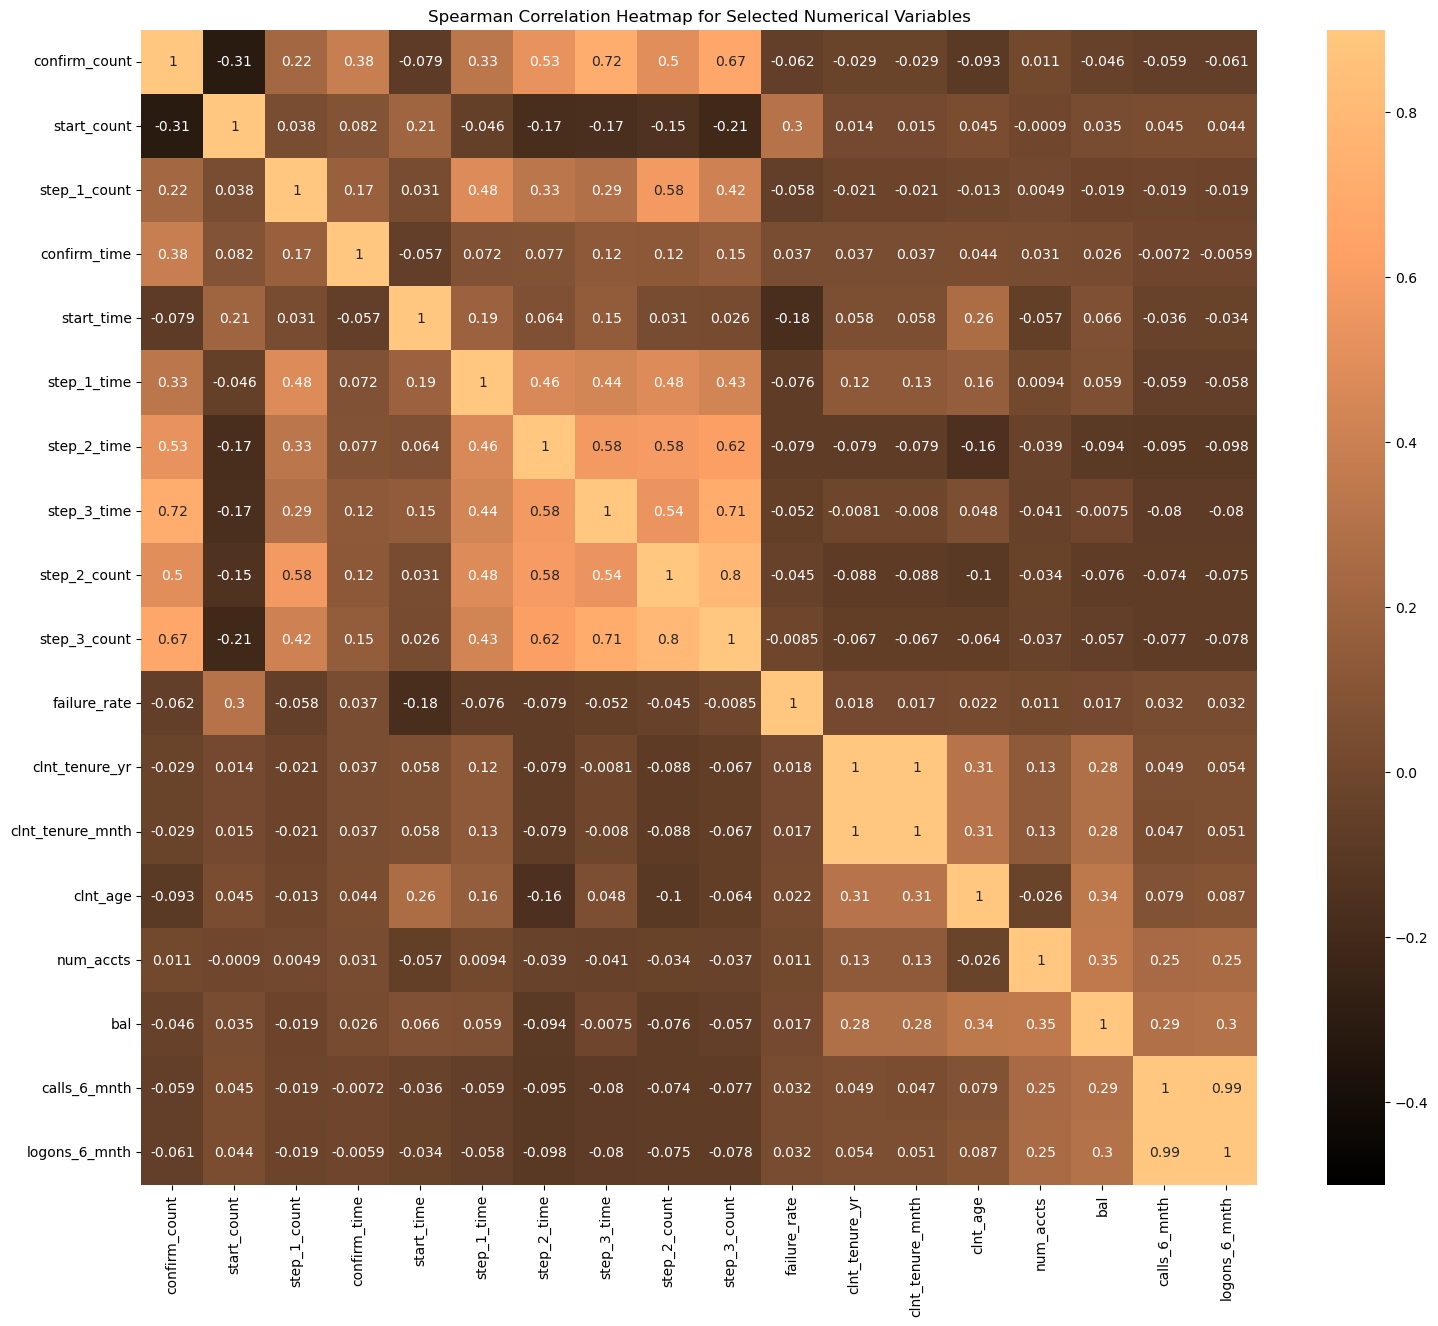

In [35]:
f.corr_map_spearman(df_control_num,-0.5,0.9)